In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
# load model file and history of the model
saved_dir = 'D:/JATHURSH/Jupyter_notebook_projects/DrowsinessDetectionOnCombinedDataset/saved_data/models/'

model = tf.keras.models.load_model(saved_dir + 'drowsiness_detection_model_1.h5')

with open(saved_dir + 'drowsiness_detection_model_1_history.pkl', 'rb') as file:
    history = pickle.load(file)

In [3]:
# load test splits
saved_dir = 'D:/JATHURSH/Jupyter_notebook_projects/DrowsinessDetectionOnCombinedDataset/saved_data/train_test_val_splits_preprocessed_combined_dataset/'

X_test = np.load(saved_dir + 'X_test.npy')

y_test = np.load(saved_dir + 'y_test.npy')

In [5]:
training_loss = history['loss']
validation_loss = history['val_loss']

training_accuracy = history['accuracy']
validation_accuracy = history['val_accuracy']

# Calculate the number of training epochs:
# - `len(training_loss)` calculates the length of the training_loss list, which typically
#   contains the loss value at the end of each training epoch.
# - This length tells us how many epochs the machine learning model was trained for.

# Create a range of values representing epochs:
# - `range(1, len(training_loss) + 1)` generates a Python range object starting from 1 and
#   ending at the length of the training_loss list plus one.
# - The +1 is added to ensure that the range includes values up to the number of epochs.
# - This range is often used as the x-axis when plotting training metrics against the
#   number of training iterations (epochs).
epochs = range(1, len(training_loss) + 1)

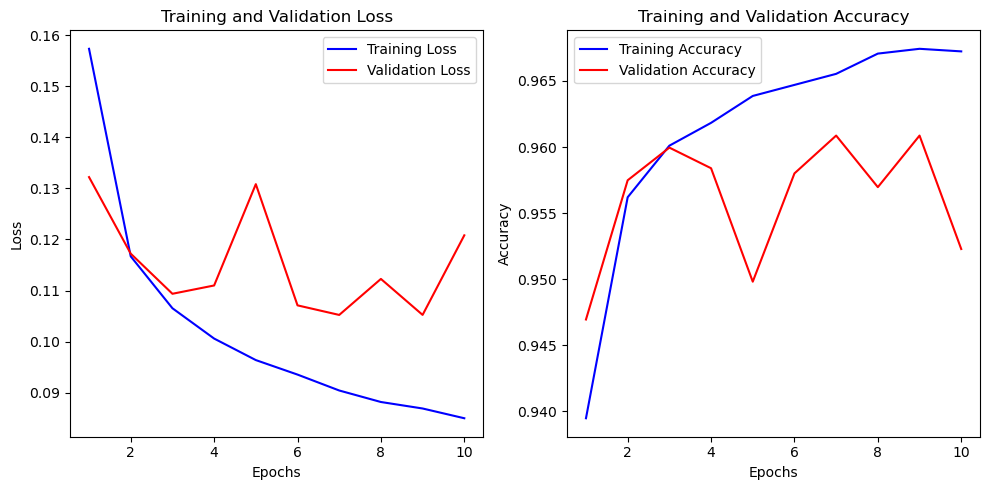

In [6]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
model.evaluate(X_test, y_test)

241/241 [==============================] - 197s 816ms/step - loss: 0.1119 - accuracy: 0.9537


[0.1119072288274765, 0.9537241458892822]

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [11]:
# Make predictions using trained model on the test dataset
y_pred = model.predict(X_test)

241/241 [==============================] - 201s 817ms/step


In [15]:
y_pred, y_test

(array([[5.5477813e-02],
        [4.6864469e-02],
        [1.0467996e-03],
        ...,
        [2.1869463e-03],
        [4.1346170e-04],
        [9.9945694e-01]], dtype=float32),
 array([0, 0, 0, ..., 0, 0, 1]))

In [16]:
# Convert y_pred probabilities to binary predictions (0 or 1), threshold = 0.5
y_pred_binary = np.round(y_pred)
y_pred_binary

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [17]:
# create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

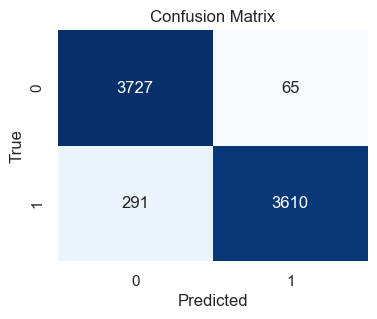

In [20]:
# Create a heatmap of the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.0)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [23]:
# create classification report
class_report = classification_report(y_test, y_pred_binary)
print(class_report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      3792
           1       0.98      0.93      0.95      3901

    accuracy                           0.95      7693
   macro avg       0.95      0.95      0.95      7693
weighted avg       0.96      0.95      0.95      7693



Precision: Precision measures the proportion of true positive predictions (correctly predicted positive samples) among all the positive predictions made by the model. In this case, for class 0 (the negative class), the precision is 0.93, and for class 1 (the positive class), the precision is 0.98. This indicates that when the model predicts class 0, it is correct 93% of the time, and when it predicts class 1, it is correct 98% of the time.

Recall: Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions among all the actual positive samples. For class 0, the recall is 0.98, which means the model correctly identifies 98% of the actual class 0 samples. For class 1, the recall is 0.93, indicating that the model identifies 93% of the actual class 1 samples.

F1-Score: The F1-score is the harmonic mean of precision and recall and provides a balance between the two metrics. It's a useful metric when you want to consider both false positives and false negatives. In this case, both classes have an F1-score of 0.95, which is an excellent balance between precision and recall.

Support: Support represents the number of actual occurrences of each class in the test dataset. There are 3792 samples of class 0 and 3901 samples of class 1.

Accuracy: Accuracy measures the overall correctness of the model's predictions. It's the ratio of correctly predicted samples to the total number of samples. The accuracy here is 0.95, indicating that the model correctly predicts the class labels for 95% of the total samples.

Macro Average (Macro Avg): This is the unweighted average of precision, recall, and F1-score across all classes. It provides an overall performance measure that treats each class equally. In this case, the macro average for precision, recall, and F1-score is 0.95.

Weighted Average (Weighted Avg): This is the weighted average of precision, recall, and F1-score, where each class's score is weighted by its support (the number of samples). It accounts for class imbalances in the dataset. In this case, the weighted average for precision, recall, and F1-score is 0.96.

In [36]:
image = cv2.imread("D:/JATHURSH/Jupyter_notebook_projects/DrowsinessDetectionOnCombinedDataset/saved_data/assets/unseen_image.jpeg")

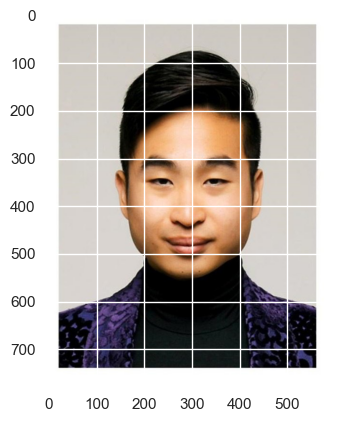

In [37]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [38]:
# Convert the image to grayscale (required for face and eye detection)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [39]:
# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the pre-trained Haar Cascade classifier for eye detection
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [40]:
# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

In [41]:
# Initialize a list to store cropped eye images
eye_images = []

# Loop over detected faces
for (x, y, w, h) in faces:
    # Draw a rectangle around the face
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    # Crop the face region for eye detection
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = image[y:y + h, x:x + w]
    
    # Detect eyes in the face region
    eyes = eye_cascade.detectMultiScale(roi_gray)
    
    # Loop over detected eyes and draw rectangles
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (255, 0, 0), 2)
        # Crop the eye region and store it in the list 
        eye_roi = roi_gray[ey:ey + eh, ex:ex + ew]
        eye_images.append(eye_roi)

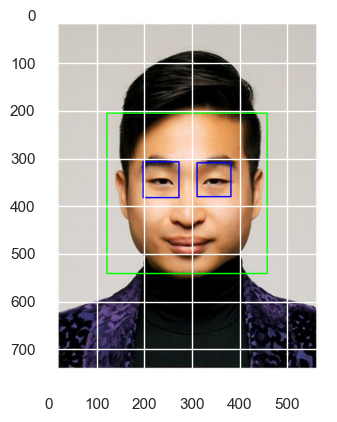

In [42]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

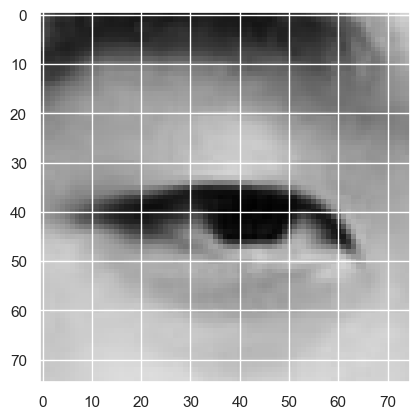

In [43]:
plt.imshow(cv2.cvtColor(eye_images[0], cv2.COLOR_BGR2RGB))

In [44]:
# Convert the grayscale image to RGB format
rgb_image = cv2.cvtColor(eye_images[0], cv2.COLOR_GRAY2RGB)

In [45]:
# Resize the image to 224x224 pixels
image_resized = cv2.resize(rgb_image, (224, 224))

# Adding the 4th dimension for compatibility with the mobileNetV2 model
final_image = np.expand_dims(image_resized, axis=0)

# Normalize - using the same mobileNetV2's preprocess_input method
final_image_preprocessed = tf.keras.applications.mobilenet_v2.preprocess_input(final_image)
final_image_preprocessed.shape

(1, 224, 224, 3)

In [46]:
# predict the image
y_pred_of_image = model.predict(final_image_preprocessed)

y_pred_binary = (y_pred_of_image >= 0.5).astype(int)
y_pred_binary

1/1 [==============================] - 0s 210ms/step


array([[1]])

1 - means open